## Problem Statement

- To predict whether the person will survive in incidents like titanic incident. 

## Import Libraries

In [108]:
import pandas as pd
import numpy as np
import re

import sqlalchemy as sa

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import plot_confusion_matrix



import pickle
import json

import warnings
warnings.filterwarnings("ignore")

In [109]:
model=[]
Training_acc=[]
Testing_acc=[]

## Data Gathering

In [1]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [112]:
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S


## Exploratory Data Analysis

In [113]:
for i in df.columns:
    df[i]=df[i].replace("",np.nan)

In [114]:
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [115]:
# Checking for datatype,missing values and unique values in a columns

lst=[]
for i in df.columns:
    a=i
    b=df[i].dtype
    c=df[i].nunique()
    d=df[i].isna().sum()
    
    lst.append([a,b,c,d])
    
df1=pd.DataFrame(lst,columns=["Column","Datatype","Unique Values","Missing Values"])
df1


,Column,Datatype,Unique Values,Missing Values
0,PassengerId,int64,891,0
1,Survived,int64,2,0
2,Pclass,int64,3,0
3,Name,object,891,0
4,Gender,object,2,0
5,Age,object,88,177
6,SibSp,int64,7,0
7,Parch,int64,7,0
8,Ticket,object,681,0
9,Fare,float64,248,0


- PassengerID and Name having all unique values.
- Ticket column also having large no. of unique values.
- Cabin having large no. of missing values.
- So, we can drop these columns.

In [116]:
df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)

In [117]:
df.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


 - We have to convert all categorical columns into numerical columns

In [118]:
# For Gender Column

df["Gender"].value_counts().to_dict()

{'male': 577, 'female': 314}

In [119]:
df["Gender"].replace({'male': 0, 'female': 1},inplace=True)    # Label Encoding

In [120]:
gender_values={'male': 0, 'female': 1}    # This will required while testing user inputs.

In [121]:
#  For Embarked Column

df["Embarked"].value_counts().to_dict()

{'S': 644, 'C': 168, 'Q': 77}

In [122]:
df["Embarked"].replace({'S': 0, 'C': 1, 'Q': 2},inplace=True)    # Label Encoding

In [123]:
Embarked_values={'S': 0, 'C': 1, 'Q': 2}     # This will required while testing user inputs.

- We have to check for missing values also

In [124]:
for i in df.columns:
    a=df[i].isna().sum()
    print(f"{i}--->",a)

Survived---> 0
Pclass---> 0
Gender---> 0
Age---> 177
SibSp---> 0
Parch---> 0
Fare---> 0
Embarked---> 2


In [125]:
# Knn imputer to impute missing values.

knn_impute=KNNImputer(n_neighbors=3)

array=knn_impute.fit_transform(df)

df=pd.DataFrame(array,columns=df.columns)
df.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,0.0,22.0,1.0,0.0,7.2500,0.0
1,1.0,1.0,1.0,38.0,1.0,0.0,71.2833,1.0
2,1.0,3.0,1.0,26.0,0.0,0.0,7.9250,0.0
3,1.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0
4,0.0,3.0,0.0,35.0,0.0,0.0,8.0500,0.0


In [126]:
for i in df.columns:
    a=df[i].isna().sum()
    print(f"{i}--->",a)

Survived---> 0
Pclass---> 0
Gender---> 0
Age---> 0
SibSp---> 0
Parch---> 0
Fare---> 0
Embarked---> 0


## Feature Engineering

In [127]:
x=df.drop("Survived",axis=1)
y=df["Survived"]

{0.0: 547, 1.0: 344}


<AxesSubplot:xlabel='Survived', ylabel='count'>

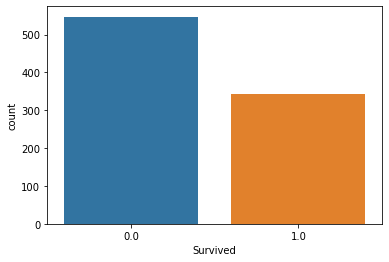

In [128]:
print(y.value_counts().to_dict())
sns.countplot(y)

- Data is not that much but somehow balanced

###### Outliers Handling

-  Age

<AxesSubplot:xlabel='Age'>

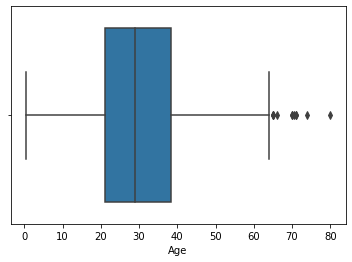

In [129]:
sns.boxplot(df["Age"])

-  Fare

<AxesSubplot:xlabel='Fare'>

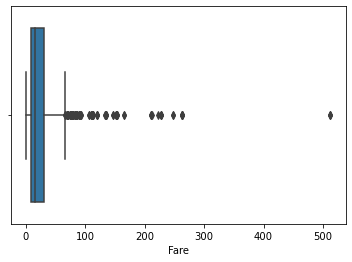

In [130]:
sns.boxplot(df["Fare"])

In [131]:
q1=df["Fare"].quantile(0.25)
q2=df["Fare"].quantile(0.5)
q3=df["Fare"].quantile(0.75)

iqr=q3-q1

upper_limit= q3+(1.5*iqr)
lower_limit= q1-(1.5*iqr)
upper_limit

65.6344

In [132]:
df["Fare"]=np.where(df["Fare"]>upper_limit,np.nan,df["Fare"])

In [133]:
array=knn_impute.fit_transform(df[["Fare"]])

df["Fare"]=pd.DataFrame(array,columns=["Fare"])

###### Features Scaling

- Normalization

In [134]:
normal=MinMaxScaler()

arr1=normal.fit_transform(x)
x_normal=pd.DataFrame(arr1,columns=x.columns)
x_normal.head()

,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.0,0.271174,0.125,0.0,0.014151,0.0
1,0.0,1.0,0.472229,0.125,0.0,0.139136,0.5
2,1.0,1.0,0.321438,0.000,0.0,0.015469,0.0
3,0.0,1.0,0.434531,0.125,0.0,0.103644,0.0
4,1.0,0.0,0.434531,0.000,0.0,0.015713,0.0


- Standardization

In [135]:
std=StandardScaler()

arr2=std.fit_transform(x)

x_std=pd.DataFrame(arr2,columns=x.columns)
x_std.head()

,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0.827377,-0.737695,-0.589335,0.432793,-0.473674,-0.502445,-0.571254
1,-1.566107,1.355574,0.555738,0.432793,-0.473674,0.786845,1.002933
2,0.827377,1.355574,-0.303067,-0.474545,-0.473674,-0.488854,-0.571254
3,-1.566107,1.355574,0.341036,0.432793,-0.473674,0.420730,-0.571254
4,0.827377,-0.737695,0.341036,-0.474545,-0.473674,-0.486337,-0.571254


## Train-Test Split

In [136]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=1,stratify=y)

In [137]:
x_normal_train,x_normal_test,y_normal_train,y_normal_test=train_test_split(x_normal,y,train_size=0.70,random_state=1,stratify=y)

In [138]:
x_std_train,x_std_test,y_std_train,y_std_test=train_test_split(x_std,y,train_size=0.70,random_state=1,stratify=y)

## Model Training

In [139]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier(random_state=1)
rf=RandomForestClassifier(random_state=1)
adb=AdaBoostClassifier(random_state=1)

In [140]:
class Model():
    
    def __init__(self,model,x_train,x_test,y_train,y_test):
        
        self.model=model
        self.x_train=x_train
        self.x_test=x_test
        self.y_train=y_train
        self.y_test=y_test
        
        print("="*120)
        print(f"  #################################   {a}   ############################")
        print("="*120,"\n\n")
        
    def model_training(self):
        model.append(a)
        self.model.fit(self.x_train,self.y_train)
        
    def hyperparamter_tunning(self,hyperparameter):
        
        rscv=RandomizedSearchCV(self.model,hyperparameter,cv=5)
        rscv.fit(self.x_train,self.y_train)
        
        self.model=rscv.best_estimator_
        self.model.fit(self.x_train,self.y_train)
        
        self.model_evaluation()
        
        return self.model
    
    def model_evaluation(self):
        
        print("****************************  Evaluation of Testing Data  ***************************")
        print()
        y_pred_test=self.model.predict(self.x_test)

        cnf_matrics=confusion_matrix(self.y_test,y_pred_test)
        print("Confusion Matrics is---->\n",cnf_matrics)
        print("="*50)

        accuracy=accuracy_score(self.y_test,y_pred_test)
        print("The accuarcy score is---->",accuracy)
        Testing_acc.append(accuracy)
        print("="*50)


        clf_report=classification_report(self.y_test,y_pred_test)
        print(" The classification report is---->\n","\n",clf_report)
        print("="*50)
        
        print()
        print("****************************  Evaluation of Training Data  ***************************")
        print()
        y_pred_train=self.model.predict(self.x_train)

        cnf_matrics=confusion_matrix(self.y_train,y_pred_train)
        print("Confusion Matrics is---->\n",cnf_matrics)
        print("="*50)

        accuracy=accuracy_score(self.y_train,y_pred_train)
        print("The accuarcy score is---->",accuracy)
        Training_acc.append(accuracy)
        print("="*50)


        clf_report=classification_report(self.y_train,y_pred_train)
        print(" The classification report is---->\n","\n",clf_report)
        print("="*50)
        
        
    def Visualize_confusion_matrics(self):
        print()
        print("********************* Visualization of confusion Matrics ****************************")
        print()
        plot_confusion_matrix(self.model,self.x_train,self.y_train)
        

  #################################   Logistics Regression   ############################


****************************  Evaluation of Testing Data  ***************************

Confusion Matrics is---->
 [[141  24]
 [ 27  76]]
The accuarcy score is----> 0.8097014925373134
 The classification report is---->
 
               precision    recall  f1-score   support

         0.0       0.84      0.85      0.85       165
         1.0       0.76      0.74      0.75       103

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268


****************************  Evaluation of Training Data  ***************************

Confusion Matrics is---->
 [[334  48]
 [ 75 166]]
The accuarcy score is----> 0.8025682182985554
 The classification report is---->
 
               precision    recall  f1-score   support

         0.0       0.82      0.87      0.84       382
         1.0       0.78     

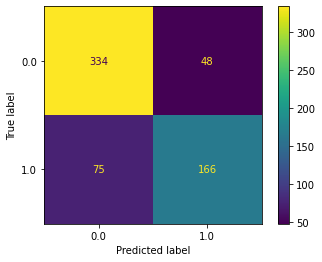

In [141]:
#####################################  Logistics Regression ################################################

a="Logistics Regression"
obj=Model(lr,x_train,x_test,y_train,y_test)
obj.model_training()
obj.model_evaluation()
obj.Visualize_confusion_matrics()

  #################################   KNN Classifier   ############################


****************************  Evaluation of Testing Data  ***************************

Confusion Matrics is---->
 [[125  40]
 [ 50  53]]
The accuarcy score is----> 0.664179104477612
 The classification report is---->
 
               precision    recall  f1-score   support

         0.0       0.71      0.76      0.74       165
         1.0       0.57      0.51      0.54       103

    accuracy                           0.66       268
   macro avg       0.64      0.64      0.64       268
weighted avg       0.66      0.66      0.66       268


****************************  Evaluation of Training Data  ***************************

Confusion Matrics is---->
 [[336  46]
 [ 68 173]]
The accuarcy score is----> 0.8170144462279294
 The classification report is---->
 
               precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       382
         1.0       0.79      0.72  

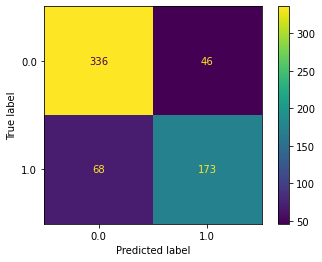

In [142]:
###################################### KNN Classifier #################################################

a="KNN Classifier"

obj=Model(knn,x_train,x_test,y_train,y_test)
obj.model_training()
obj.model_evaluation()
obj.Visualize_confusion_matrics()

  #################################   KNN classifer with Normalization   ############################


****************************  Evaluation of Testing Data  ***************************

Confusion Matrics is---->
 [[143  22]
 [ 27  76]]
The accuarcy score is----> 0.8171641791044776
 The classification report is---->
 
               precision    recall  f1-score   support

         0.0       0.84      0.87      0.85       165
         1.0       0.78      0.74      0.76       103

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268


****************************  Evaluation of Training Data  ***************************

Confusion Matrics is---->
 [[355  27]
 [ 60 181]]
The accuarcy score is----> 0.8603531300160514
 The classification report is---->
 
               precision    recall  f1-score   support

         0.0       0.86      0.93      0.89       382
         1.0    

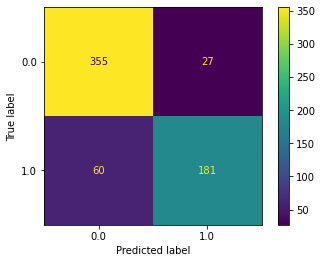

In [143]:
#################################  KNN classifer with Normalization  #####################################

a="KNN classifer with Normalization"
obj=Model(knn,x_normal_train,x_normal_test,y_normal_train,y_normal_test)
obj.model_training()
obj.model_evaluation()
obj.Visualize_confusion_matrics()

  #################################   KNN classifer with Standardization   ############################


****************************  Evaluation of Testing Data  ***************************

Confusion Matrics is---->
 [[139  26]
 [ 28  75]]
The accuarcy score is----> 0.7985074626865671
 The classification report is---->
 
               precision    recall  f1-score   support

         0.0       0.83      0.84      0.84       165
         1.0       0.74      0.73      0.74       103

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268


****************************  Evaluation of Training Data  ***************************

Confusion Matrics is---->
 [[348  34]
 [ 57 184]]
The accuarcy score is----> 0.8539325842696629
 The classification report is---->
 
               precision    recall  f1-score   support

         0.0       0.86      0.91      0.88       382
         1.0  

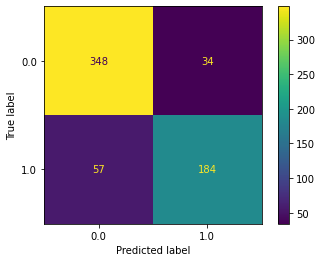

In [144]:
#################################  KNN classifer with Standardization  #####################################

a="KNN classifer with Standardization"
obj=Model(knn,x_std_train,x_std_test,y_std_train,y_std_test)
obj.model_training()
obj.model_evaluation()
obj.Visualize_confusion_matrics()

  #################################   Decision Tree Classifier   ############################


****************************  Evaluation of Testing Data  ***************************

Confusion Matrics is---->
 [[132  33]
 [ 30  73]]
The accuarcy score is----> 0.7649253731343284
 The classification report is---->
 
               precision    recall  f1-score   support

         0.0       0.81      0.80      0.81       165
         1.0       0.69      0.71      0.70       103

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.77      0.76      0.77       268


****************************  Evaluation of Training Data  ***************************

Confusion Matrics is---->
 [[382   0]
 [  3 238]]
The accuarcy score is----> 0.9951845906902087
 The classification report is---->
 
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       382
         1.0       1.00 

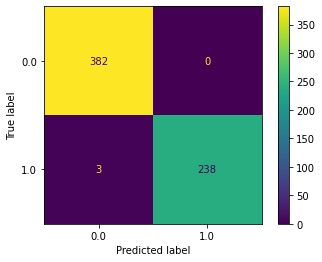

In [145]:
#####################################  Decision Tree Classifier ################################################

a="Decision Tree Classifier"
obj=Model(dt,x_train,x_test,y_train,y_test)
obj.model_training()
obj.model_evaluation()
obj.Visualize_confusion_matrics()

#### Hyperparameter Tunning For Decision Tree

In [146]:
hyperparameters = {"criterion":['gini', 'entropy'],
                 'max_depth':np.arange(3,8),
                 'min_samples_split': np.arange(2,20),
                 'min_samples_leaf':np.arange(2,15)}

In [147]:
###########################  Decision Tree Classifier with Hyperparameter Tunning ####################################

a="Decision Tree Classifier with Hyperparameter Tunning"
obj=Model(dt,x_train,x_test,y_train,y_test)
obj.model_training()
obj.hyperparamter_tunning(hyperparameters)


  #################################   Decision Tree Classifier with Hyperparameter Tunning   ############################


****************************  Evaluation of Testing Data  ***************************

Confusion Matrics is---->
 [[157   8]
 [ 38  65]]
The accuarcy score is----> 0.8283582089552238
 The classification report is---->
 
               precision    recall  f1-score   support

         0.0       0.81      0.95      0.87       165
         1.0       0.89      0.63      0.74       103

    accuracy                           0.83       268
   macro avg       0.85      0.79      0.81       268
weighted avg       0.84      0.83      0.82       268


****************************  Evaluation of Training Data  ***************************

Confusion Matrics is---->
 [[361  21]
 [ 73 168]]
The accuarcy score is----> 0.8491171749598716
 The classification report is---->
 
               precision    recall  f1-score   support

         0.0       0.83      0.95      0.88       

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=9,
                       min_samples_split=13, random_state=1)

In [148]:
dt_hyp=DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=11,
                       random_state=1)

#### Prunning for Decision Tree

In [149]:
result=dt.cost_complexity_pruning_path(x_train,y_train)

In [150]:
ccp_alpha_values=result["ccp_alphas"]

In [151]:
training_acc=[]
testing_acc=[]

for i in ccp_alpha_values:
    dt_prun_model=DecisionTreeClassifier(ccp_alpha=i,random_state=1)
    dt_prun_model.fit(x_train,y_train)
    
    acc1=dt_prun_model.score(x_train,y_train)
    training_acc.append(acc1)
    
    acc2=dt_prun_model.score(x_test,y_test)
    testing_acc.append(acc2)
    
    

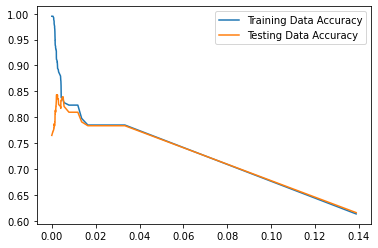

In [152]:
fig, ax = plt.subplots()
ax.plot(ccp_alpha_values, training_acc, label = "Training Data Accuracy")
ax.plot(ccp_alpha_values, testing_acc, label = "Testing Data Accuracy")
ax.legend()

In [153]:
index=testing_acc.index(max(testing_acc))
index

34

In [154]:
best_ccp_alpha=ccp_alpha_values[index]
best_ccp_alpha

0.0021401819154628146

In [155]:
dt_prun_model=DecisionTreeClassifier(ccp_alpha=best_ccp_alpha,random_state=1)

  #################################   Decision Tree Classifier with Prunning   ############################


****************************  Evaluation of Testing Data  ***************************

Confusion Matrics is---->
 [[150  15]
 [ 27  76]]
The accuarcy score is----> 0.8432835820895522
 The classification report is---->
 
               precision    recall  f1-score   support

         0.0       0.85      0.91      0.88       165
         1.0       0.84      0.74      0.78       103

    accuracy                           0.84       268
   macro avg       0.84      0.82      0.83       268
weighted avg       0.84      0.84      0.84       268


****************************  Evaluation of Training Data  ***************************

Confusion Matrics is---->
 [[364  18]
 [ 37 204]]
The accuarcy score is----> 0.9117174959871589
 The classification report is---->
 
               precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       382
         1

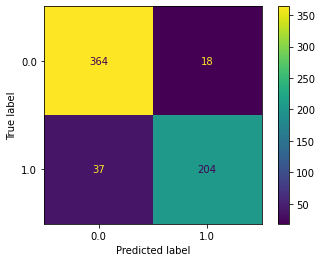

In [156]:
#####################################  Decision Tree Classifier with Prunning #####################################

a="Decision Tree Classifier with Prunning"
obj=Model(dt_prun_model,x_train,x_test,y_train,y_test)
obj.model_training()
obj.model_evaluation()
obj.Visualize_confusion_matrics()

  #################################   Random Forest Classifier   ############################


****************************  Evaluation of Testing Data  ***************************

Confusion Matrics is---->
 [[140  25]
 [ 26  77]]
The accuarcy score is----> 0.8097014925373134
 The classification report is---->
 
               precision    recall  f1-score   support

         0.0       0.84      0.85      0.85       165
         1.0       0.75      0.75      0.75       103

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268


****************************  Evaluation of Training Data  ***************************

Confusion Matrics is---->
 [[381   1]
 [  2 239]]
The accuarcy score is----> 0.9951845906902087
 The classification report is---->
 
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       382
         1.0       1.00 

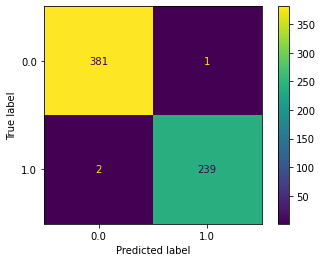

In [157]:
#####################################  Random Forest Classifier #####################################

a="Random Forest Classifier"
obj=Model(rf,x_train,x_test,y_train,y_test)
obj.model_training()
obj.model_evaluation()
obj.Visualize_confusion_matrics()

#### Hyperparameter Tunning For Random Forest 

In [158]:
hyperparameters = {'n_estimators':np.arange(10,200),
                   'criterion':['gini','entropy'],
                   'max_depth':np.arange(3,8),
                   'min_samples_split':np.arange(2,20),
                   'min_samples_leaf':np.arange(3,10),
                   'max_features':['sqrt','log2'],
                   'oob_score':[True],
                  'ccp_alpha':list(np.random.random(10))}


In [159]:
#########################  Random Forest Classifier with Hyperparameter Tunning ############################

a="Random Forest Classifier with Hyperparameter Tunning"
obj=Model(rf,x_train,x_test,y_train,y_test)
obj.model_training()
obj.hyperparamter_tunning(hyperparameters)

  #################################   Random Forest Classifier with Hyperparameter Tunning   ############################


****************************  Evaluation of Testing Data  ***************************

Confusion Matrics is---->
 [[162   3]
 [ 52  51]]
The accuarcy score is----> 0.7947761194029851
 The classification report is---->
 
               precision    recall  f1-score   support

         0.0       0.76      0.98      0.85       165
         1.0       0.94      0.50      0.65       103

    accuracy                           0.79       268
   macro avg       0.85      0.74      0.75       268
weighted avg       0.83      0.79      0.78       268


****************************  Evaluation of Training Data  ***************************

Confusion Matrics is---->
 [[376   6]
 [131 110]]
The accuarcy score is----> 0.7800963081861958
 The classification report is---->
 
               precision    recall  f1-score   support

         0.0       0.74      0.98      0.85       

RandomForestClassifier(ccp_alpha=0.06685767933492037, criterion='entropy',
                       max_depth=3, min_samples_leaf=7, min_samples_split=4,
                       n_estimators=14, oob_score=True, random_state=1)

In [160]:
rf_hyp=RandomForestClassifier(ccp_alpha=0.10668083604147127, criterion='entropy',
                       max_depth=6, max_features='log2', min_samples_leaf=8,
                       min_samples_split=7, n_estimators=188, oob_score=True,
                       random_state=1)

  #################################   AdaBoost Classifier   ############################


****************************  Evaluation of Testing Data  ***************************

Confusion Matrics is---->
 [[140  25]
 [ 28  75]]
The accuarcy score is----> 0.8022388059701493
 The classification report is---->
 
               precision    recall  f1-score   support

         0.0       0.83      0.85      0.84       165
         1.0       0.75      0.73      0.74       103

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268


****************************  Evaluation of Training Data  ***************************

Confusion Matrics is---->
 [[343  39]
 [ 54 187]]
The accuarcy score is----> 0.8507223113964687
 The classification report is---->
 
               precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       382
         1.0       0.83      

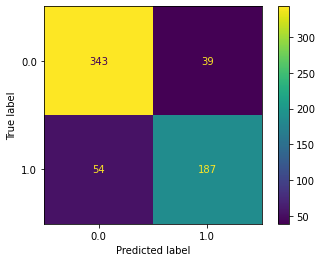

In [161]:
#########################  AdaBoost Classifier  ############################

a="AdaBoost Classifier"
obj=Model(adb,x_train,x_test,y_train,y_test)
obj.model_training()
obj.model_evaluation()
obj.Visualize_confusion_matrics()

#### Hyperparameter Tunning For Adaboost

In [162]:
hyperparameters = {"n_estimators":np.arange(10, 100),
                  "learning_rate":np.arange(0, 2, 0.001)}

In [163]:
#########################  AdaBoost Classifier with Hyperparameter Tunning ############################

a="AdaBoost Classifier with Hyperparameter Tunning"
obj=Model(adb,x_train,x_test,y_train,y_test)
obj.model_training()
obj.hyperparamter_tunning(hyperparameters)

  #################################   AdaBoost Classifier with Hyperparameter Tunning   ############################


****************************  Evaluation of Testing Data  ***************************

Confusion Matrics is---->
 [[141  24]
 [ 33  70]]
The accuarcy score is----> 0.7873134328358209
 The classification report is---->
 
               precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       165
         1.0       0.74      0.68      0.71       103

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268


****************************  Evaluation of Training Data  ***************************

Confusion Matrics is---->
 [[337  45]
 [ 69 172]]
The accuarcy score is----> 0.8170144462279294
 The classification report is---->
 
               precision    recall  f1-score   support

         0.0       0.83      0.88      0.86       382
 

AdaBoostClassifier(learning_rate=0.196, n_estimators=39, random_state=1)

In [164]:
adb_hyp = AdaBoostClassifier(learning_rate=0.8230000000000001, n_estimators=17,
                   random_state=1)

In [165]:
df_comp=pd.DataFrame({"Model":model,"Training_acc":Training_acc,"Testing_acc":Testing_acc})
df_comp

,Model,Training_acc,Testing_acc
0,Logistics Regression,0.802568,0.809701
1,KNN Classifier,0.817014,0.664179
2,KNN classifer with Normalization,0.860353,0.817164
3,KNN classifer with Standardization,0.853933,0.798507
4,Decision Tree Classifier,0.995185,0.764925
5,Decision Tree Classifier with Hyperparameter T...,0.849117,0.828358
6,Decision Tree Classifier with Prunning,0.911717,0.843284
7,Random Forest Classifier,0.995185,0.809701
8,Random Forest Classifier with Hyperparameter T...,0.780096,0.794776
9,AdaBoost Classifier,0.850722,0.802239


In [167]:
index=Testing_acc.index(max(Testing_acc))

In [168]:
print(f"Maximum Accuracy is given by {model[index]}")

Maximum Accuracy is given by Decision Tree Classifier with Prunning


- But Variance for Decision Tree Classifier with Prunning. 
- Hence we will prefer Decision Tree Classifier with Hyperparameter Tunning

### Feature Selection

In [169]:
from sklearn.feature_selection import SequentialFeatureSelector

In [193]:
lsss=LogisticRegression()

sfs=SequentialFeatureSelector(lsss,n_features_to_select=5,direction='forward',cv=5)

sfs.fit(x_train,y_train)
arr = sfs.get_support()
# s3 = pd.Series(arr, index=x.columns)
# s3

selected_features = sfs.get_feature_names_out()

selected_features
# arr

array(['x0', 'x1', 'x3', 'x4', 'x5'], dtype=object)

In [177]:
test_acc1=[]
train_acc1=[]

def Fwd_features_selection(lst):
    
    for i in lst:
        sfs=SequentialFeatureSelector(i,n_features_to_select=5)
        
        sfs.fit(x_train,y_train)
        
        selected_features=sfs.get_feature_names_out()
        
        print(f"Selected Fetures for algorithm {i} are--->",list(selected_features))
        
        y_pred=i.predict(x_test[selected_features])
        test_acc=accuracy_score(y_test,y_pred)
        test_acc1.append(test_acc)
        
        y_pred_train=i.predict(x_train[selected_features])
        train_acc=accuracy_score(y_train,y_pred_train)
        train_acc1.append(train_acc)
 

    print(test_acc1,train_acc1)

lst=[lr,knn,dt,rf,adb]
Fwd_features_selection(lst)
    
    
    

Selected Fetures for algorithm LogisticRegression() are---> ['x0', 'x1', 'x3', 'x4', 'x5']


KeyError: "None of [Index(['x0', 'x1', 'x3', 'x4', 'x5'], dtype='object')] are in the [columns]"

In [176]:
df_comp

,Model,Training_acc,Testing_acc
0,Logistics Regression,0.802568,0.809701
1,KNN Classifier,0.817014,0.664179
2,KNN classifer with Normalization,0.860353,0.817164
3,KNN classifer with Standardization,0.853933,0.798507
4,Decision Tree Classifier,0.995185,0.764925
5,Decision Tree Classifier with Hyperparameter T...,0.849117,0.828358
6,Decision Tree Classifier with Prunning,0.911717,0.843284
7,Random Forest Classifier,0.995185,0.809701
8,Random Forest Classifier with Hyperparameter T...,0.780096,0.794776
9,AdaBoost Classifier,0.850722,0.802239
